In [1]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
hepatitis = fetch_ucirepo(id=46) 
  
# data (as pandas dataframes) 
X = hepatitis.data.features 
y = hepatitis.data.targets

categorical = ['Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders', 'Ascites', 'Varices', 'Histology']
numeric = ['Age', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime']

combined_df = pd.concat([X, y], axis=1)
combined_df.describe()


,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology,Class
count,155.000000,155.000000,154.000000,155.000000,154.000000,154.000000,154.000000,145.000000,144.000000,150.00000,150.000000,150.000000,150.00000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000,155.000000
mean,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,1.583333,1.80000,1.660000,1.866667,1.88000,1.427517,105.325397,85.89404,3.817266,61.852273,1.451613,1.793548
std,12.565878,0.305240,0.501589,0.362923,0.478730,0.490682,0.407051,0.379049,0.494727,0.40134,0.475296,0.341073,0.32605,1.212149,51.508109,89.65089,0.651523,22.875244,0.499266,0.406070
min,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,0.300000,26.000000,14.00000,2.100000,0.000000,1.000000,1.000000
25%,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.00000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000,2.000000
50%,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000,2.000000
75%,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,1.500000,132.250000,100.50000,4.200000,76.250000,2.000000,2.000000
max,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.00000,8.000000,295.000000,648.00000,6.400000,100.000000,2.000000,2.000000


In [2]:
combined_df.dropna(inplace=True)
X = combined_df.drop(columns=['Class'])
y = combined_df['Class']

In [3]:
combined_df.describe()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology,Class
count,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000
mean,40.66250,1.137500,1.525000,1.737500,1.350000,1.612500,1.850000,1.837500,1.525000,1.812500,1.687500,1.850000,1.875000,1.221250,102.912500,82.025000,3.843750,62.512500,1.41250,1.837500
std,11.28003,0.346547,0.502525,0.442769,0.479979,0.490253,0.359324,0.371236,0.502525,0.392775,0.466437,0.359324,0.332805,0.875213,53.684779,71.599974,0.576292,23.427774,0.49539,0.371236
min,20.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.00000,1.000000
25%,32.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,68.250000,30.750000,3.500000,46.000000,1.00000,2.000000
50%,38.50000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,85.000000,56.500000,4.000000,62.000000,1.00000,2.000000
75%,49.25000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.300000,133.500000,102.750000,4.200000,77.250000,2.00000,2.000000
max,72.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.800000,280.000000,420.000000,5.000000,100.000000,2.00000,2.000000


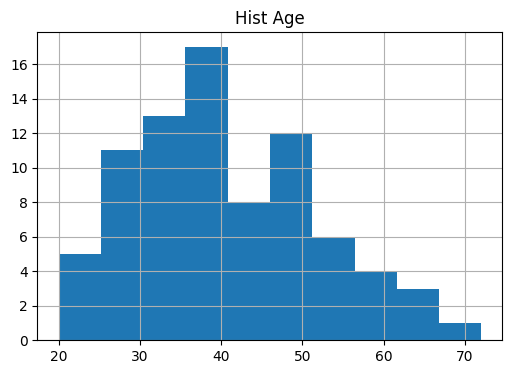

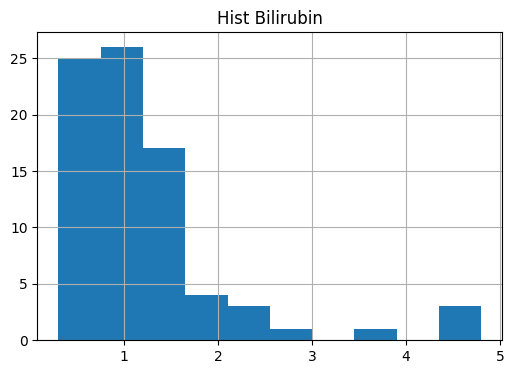

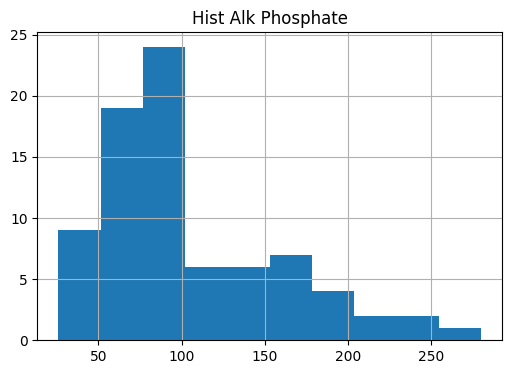

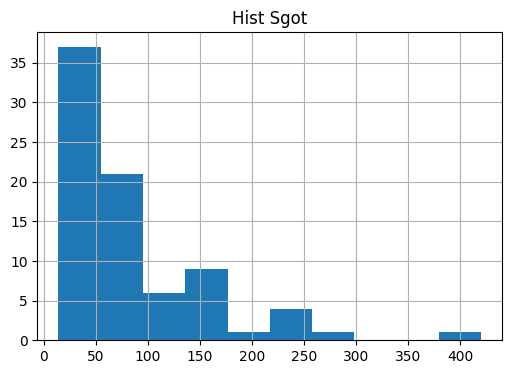

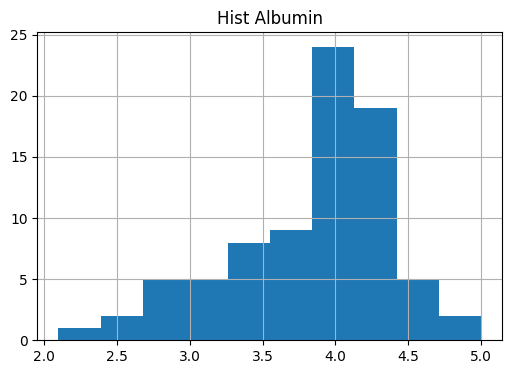

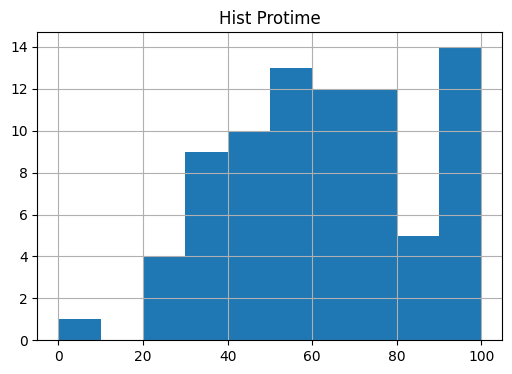

In [4]:
# histograms
from matplotlib import pyplot as plt
for column in numeric:
    plt.figure(figsize=(6, 4))
    X[column].hist()
    plt.title(f"Hist {column}")

    plt.show()

<Axes: >

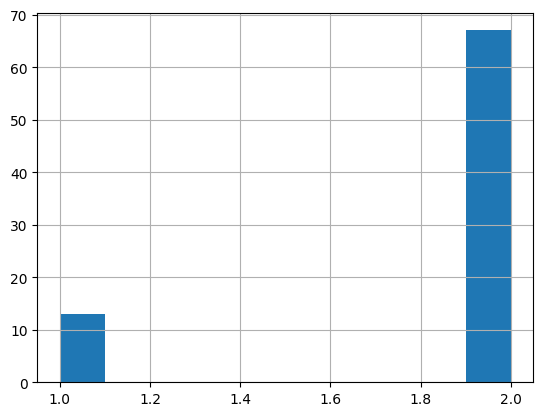

In [5]:
y.hist()

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numeric] = scaler.fit_transform(X[numeric])
combined_df[numeric] = scaler.fit_transform(combined_df[numeric])

numeric_data = X[numeric]

<Axes: >

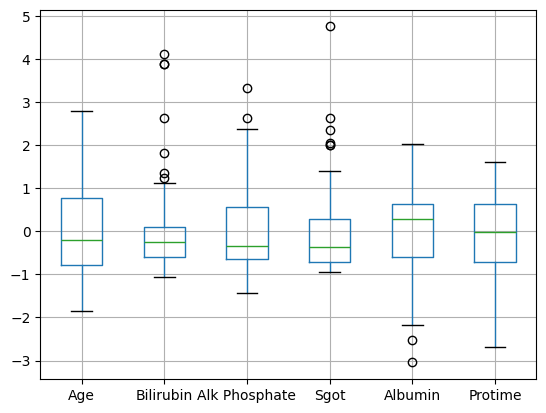

In [7]:
numeric_data.boxplot()

<Axes: >

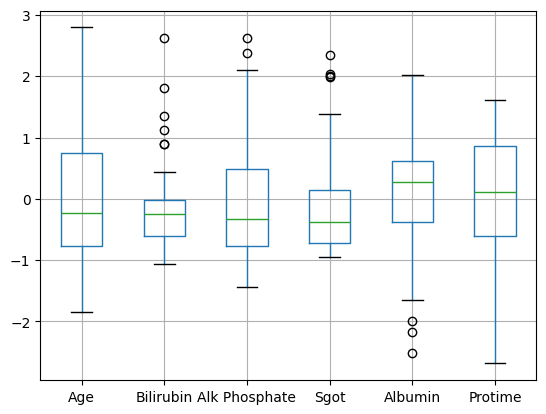

In [8]:
import scipy

X = X[(np.abs(scipy.stats.zscore(numeric_data)) < 3).all(axis=1)]
X[numeric].boxplot()

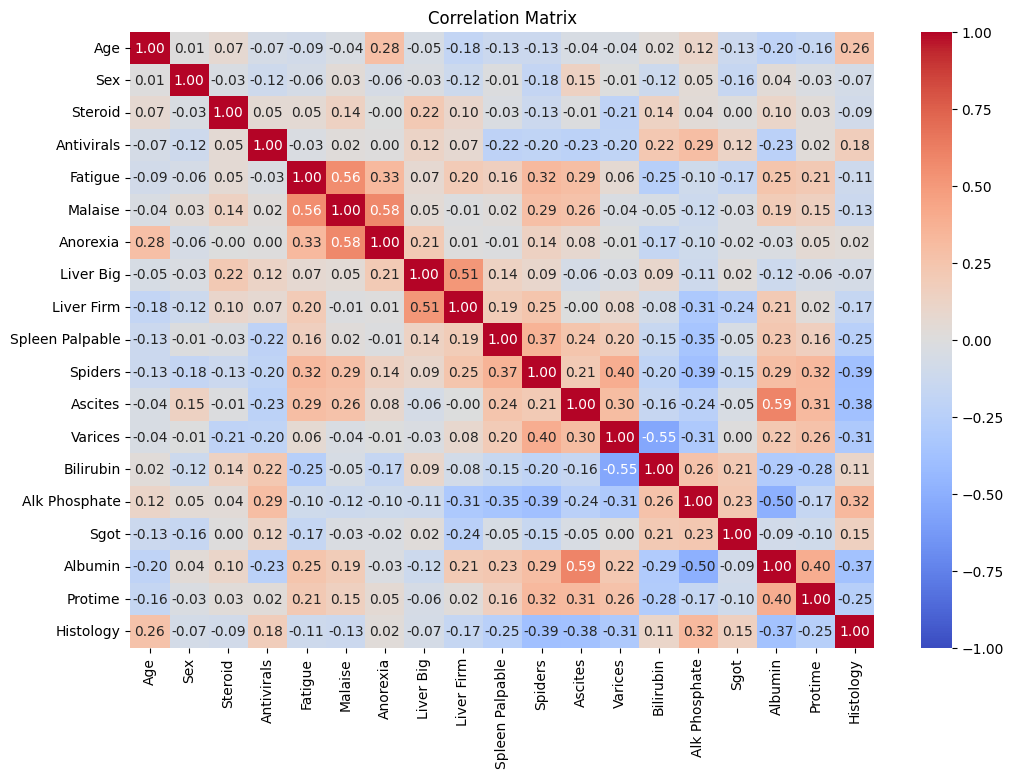

In [9]:
corr = X.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)],
    remainder='passthrough'
)

combined_df_encoded = preprocessor.fit_transform(combined_df)
combined_df_encoded = pd.DataFrame(combined_df_encoded, columns=preprocessor.get_feature_names_out())

In [11]:
y = combined_df_encoded['remainder__Class']
X_encoded = combined_df_encoded.drop(columns=['remainder__Class'])

In [12]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=31337)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
print("AdaBoost:\n", classification_report(y_test, y_pred_ada))

Logistic Regression:
               precision    recall  f1-score   support

         1.0       0.50      0.60      0.55         5
         2.0       0.92      0.89      0.91        27

    accuracy                           0.84        32
   macro avg       0.71      0.74      0.73        32
weighted avg       0.86      0.84      0.85        32

Random Forest:
               precision    recall  f1-score   support

         1.0       0.67      0.40      0.50         5
         2.0       0.90      0.96      0.93        27

    accuracy                           0.88        32
   macro avg       0.78      0.68      0.71        32
weighted avg       0.86      0.88      0.86        32

AdaBoost:
               precision    recall  f1-score   support

         1.0       0.50      0.60      0.55         5
         2.0       0.92      0.89      0.91        27

    accuracy                           0.84        32
   macro avg       0.71      0.74      0.73        32
weighted avg       0.86  

In [13]:
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['cat__Sex_1', 'cat__Sex_2', 'cat__Steroid_1.0', 'cat__Steroid_2.0',
       'cat__Antivirals_1', 'cat__Antivirals_2', 'cat__Fatigue_1.0',
       'cat__Fatigue_2.0', 'cat__Malaise_1.0', 'cat__Malaise_2.0',
       'cat__Anorexia_1.0', 'cat__Anorexia_2.0', 'cat__Liver Big_1.0',
       'cat__Liver Big_2.0', 'cat__Liver Firm_1.0', 'cat__Liver Firm_2.0',
       'cat__Spleen Palpable_1.0', 'cat__Spleen Palpable_2.0',
       'cat__Spiders_1.0', 'cat__Spiders_2.0', 'cat__Ascites_1.0',
       'cat__Ascites_2.0', 'cat__Varices_1.0', 'cat__Varices_2.0',
       'cat__Histology_1', 'cat__Histology_2', 'remainder__Age',
       'remainder__Bilirubin', 'remainder__Alk Phosphate',
       'remainder__Sgot', 'remainder__Albumin', 'remainder__Protime',
       'remainder__Class'], dtype=object)

In [14]:
importances_rf = rf_model.feature_importances_
importances_lr = abs(lr_model.coef_[0])
importances_ada = ada_model.feature_importances_

importances_rf /= np.sum(importances_rf)
importances_lr /= np.sum(importances_lr)
importances_ada /= np.sum(importances_ada)

average_importances = (importances_rf + importances_lr + importances_ada) / 3
average_importances

array([0.01718207, 0.01509484, 0.01170335, 0.01155111, 0.00282711,
       0.002441  , 0.00832234, 0.00604096, 0.00720205, 0.00991677,
       0.0142975 , 0.02133428, 0.02169389, 0.01604979, 0.01238166,
       0.0091248 , 0.00617698, 0.0036473 , 0.03159664, 0.02433032,
       0.02502188, 0.02301929, 0.00858682, 0.01118652, 0.07023022,
       0.04372037, 0.08052016, 0.13449773, 0.03949803, 0.11073444,
       0.07700238, 0.12306742])

In [15]:
indices_avg = np.argsort(average_importances)[::-1]
print("Top Features:")
for idx in indices_avg:
    print(f"{feature_names[idx]}: {average_importances[idx]:.4f}")

Top Features:
remainder__Bilirubin: 0.1345
remainder__Protime: 0.1231
remainder__Sgot: 0.1107
remainder__Age: 0.0805
remainder__Albumin: 0.0770
cat__Histology_1: 0.0702
cat__Histology_2: 0.0437
remainder__Alk Phosphate: 0.0395
cat__Spiders_1.0: 0.0316
cat__Ascites_1.0: 0.0250
cat__Spiders_2.0: 0.0243
cat__Ascites_2.0: 0.0230
cat__Liver Big_1.0: 0.0217
cat__Anorexia_2.0: 0.0213
cat__Sex_1: 0.0172
cat__Liver Big_2.0: 0.0160
cat__Sex_2: 0.0151
cat__Anorexia_1.0: 0.0143
cat__Liver Firm_1.0: 0.0124
cat__Steroid_1.0: 0.0117
cat__Steroid_2.0: 0.0116
cat__Varices_2.0: 0.0112
cat__Malaise_2.0: 0.0099
cat__Liver Firm_2.0: 0.0091
cat__Varices_1.0: 0.0086
cat__Fatigue_1.0: 0.0083
cat__Malaise_1.0: 0.0072
cat__Spleen Palpable_1.0: 0.0062
cat__Fatigue_2.0: 0.0060
cat__Spleen Palpable_2.0: 0.0036
cat__Antivirals_1: 0.0028
cat__Antivirals_2: 0.0024


In [18]:
top_10_features_idx = indices_avg[:10]
top_10_features = feature_names[top_10_features_idx]

X_top_10 = X_encoded[top_10_features]

X_train_top_10, X_test_top_10, y_train, y_test = train_test_split(X_top_10, y, test_size=0.2, random_state=1337)

lr_model_top_10 = LogisticRegression()
lr_model_top_10.fit(X_train_top_10, y_train)
y_pred_lr_top_10 = lr_model_top_10.predict(X_test_top_10)
print("Logistic Regression (Top 10 Features):\n", classification_report(y_test, y_pred_lr_top_10))

rf_model_top_10 = RandomForestClassifier()
rf_model_top_10.fit(X_train_top_10, y_train)
y_pred_rf_top_10 = rf_model_top_10.predict(X_test_top_10)
print("Random Forest (Top 10 Features):\n", classification_report(y_test, y_pred_rf_top_10))

ada_model_top_10 = AdaBoostClassifier()
ada_model_top_10.fit(X_train_top_10, y_train)
y_pred_ada_top_10 = ada_model_top_10.predict(X_test_top_10)
print("AdaBoost (Top 10 Features):\n", classification_report(y_test, y_pred_ada_top_10))

Logistic Regression (Top 10 Features):
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00        15

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Random Forest (Top 10 Features):
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00        15

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

AdaBoost (Top 10 Features):
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00        15

    accuracy                           1.00        16
   macro avg       1.00  